心路歷程1：想要先切開再合起來sort，發現很難處理兩個兩個的順序指定

In [118]:
def split(list):
    n=1
    left=[]
    right=[]
    
    if len(list)>1:
        left=list[:n]
        right=list[n:]
        split(right)
        print(left)

心路歷程2：先嘗試將兩個sort好的list merge起來

In [1]:
def merge(left,right):
    i=0
    j=0
    result=[]
    while i<len(left) and j<len(right):
        if (left[i]<=right[j]):
            a=left[i]
            result.append(a)
            i+=1
        else:
            a=right[j]
            result.append(a)
            j+=1
        #這一步時範例left已經跑完，此時j=2，m=4
    while j<len(right):
        a=right[j]
        result.append(a)
        j+=1
    #同理可得如果左邊比較長的話
    while i<len(left):
        a=left[i]
        result.append(a)
        i+=1
    return result


In [2]:
aa=[1,3,4]
bb=[-2,0,5,7]

In [4]:
merge(aa,bb)

[-2, 0, 1, 3, 4, 5, 7]

merge的部分沒有問題，再試一組

In [4]:
cc=[2,3,5,6]
dd=[1,7,8]

In [6]:
merge(cc,dd)

[1, 2, 3, 5, 6, 7, 8]

心路歷程3：解決分割的問題

In [8]:
def split(list):
    n=len(list)
    left=list[:n//2]
    right=list[n//2:]
    print('left',left,'right',right)
    if n <= 1:
        return list    

In [9]:
split(cc)

left [2, 3] right [5, 6]


In [2]:
def split(list):
    n=len(list)
    left=list[:n//2]
    right=list[n//2:]
    print('left',left,'right',right)
    if len(left)>1:
        split(left)
    if len(right)>1:
        split(right)

In [5]:
split(cc)

left [2, 3] right [5, 6]
left [2] right [3]
left [5] right [6]


In [6]:
split(dd)

left [1] right [7, 8]
left [7] right [8]


分割部分也搞定，看可不可以把它們合起來

In [ ]:
程式版本1

In [15]:
def merge(left,right):
    i=0
    j=0
    result=[]
    while i<len(left) and j<len(right):
        if (left[i]<=right[j]):
            a=left[i]
            result.append(a)
            i+=1
        else:
            a=right[j]
            result.append(a)
            j+=1
    while j<len(right):
        a=right[j]
        result.append(a)
        j+=1
    while i<len(left):
        a=left[i]
        result.append(a)
        i+=1
    print('result',result)
    return result


def split(list):
    n=len(list)
    left=list[:n//2]
    right=list[n//2:]
    if len(left)>1:
        split(left)
    if len(right)>1:
        split(right)
    print('left',left,'right',right)
    return merge(left,right)

In [16]:
mylist=[5,2,4,0,-3,9]

In [17]:
split(mylist)

left [2] right [4]
result [2, 4]
left [5] right [2, 4]
result [2, 4, 5]
left [-3] right [9]
result [-3, 9]
left [0] right [-3, 9]
result [-3, 0, 9]
left [5, 2, 4] right [0, -3, 9]
result [0, -3, 5, 2, 4, 9]


[0, -3, 5, 2, 4, 9]

……為什麼會這樣。想了很久也沒想出來，只能再次依靠網絡資料     
發現參考資料有加一行       
if __name__ == '__main__':       
    a =  merge_sort(l)      
    print a       
加起來試試看     
參考資料https://zhuanlan.zhihu.com/p/52802366

In [14]:
def merge(left,right):
    i=0
    j=0
    result=[]
    while i<len(left) and j<len(right):
        if (left[i]<=right[j]):
            a=left[i]
            result.append(a)
            i+=1
        else:
            a=right[j]
            result.append(a)
            j+=1
    while j<len(right):
        a=right[j]
        result.append(a)
        j+=1
    while i<len(left):
        a=left[i]
        result.append(a)
        i+=1
    return result


def merge_sort(list):
    n=len(list)
    left=list[:n//2]
    right=list[n//2:]
    if len(left)>1:
        merge_sort(left)
    if len(right)>1:
        merge_sort(right)
    return merge(left,right)

if __name__ == '__main__':
    k =  merge_sort(list)
    print(k)

TypeError: object of type 'type' has no len()

emmmm,錯誤了，還是不行

目前這個版本一直卡在這個地方，想不出來……

一籌莫展的情況下繼續刷網頁，發現有另一種寫法      
前面分割的部分相同，但在merge的時候直接改原來的list      
1.先分割    
2.除了左右兩邊分別的index i和j外，還有對應到原來list的index      
3.left和right進行比較，小的那個放進list裡面    
參考資料https://medium.com/appworks-school/初學者學演算法-排序法進階-合併排序法-6252651c6f7e

In [22]:
def merge_sort(list):
    n=len(list)
    left=list[:n//2]
    right=list[n//2:]
    if len(left)>1:
        merge_sort(left)
    if len(right)>1:
        merge_sort(right)
    
    i=0
    j=0
    m=0
    while i<len(left) and j<len(right):
        if left[i]<=right[j]:
            list[m]=left[i]
            i+=1
        else:
            list[m]=right[j]
            j+=1
        m+=1
    while i<len(left):
        list[m]=left[i]
        i+=1
        m+=1
    while j<len(right):
        list[m]=right[j]
        j+=1
        m+=1
    return list

In [23]:
mylist=[5,2,4,0,-3,9]

In [24]:
print(merge_sort(mylist))

[-3, 0, 2, 4, 5, 9]


成功！但是是借鑒了網頁的，我仍在想辦法搞懂自己的那套為什麼不行……

最後放上流程圖

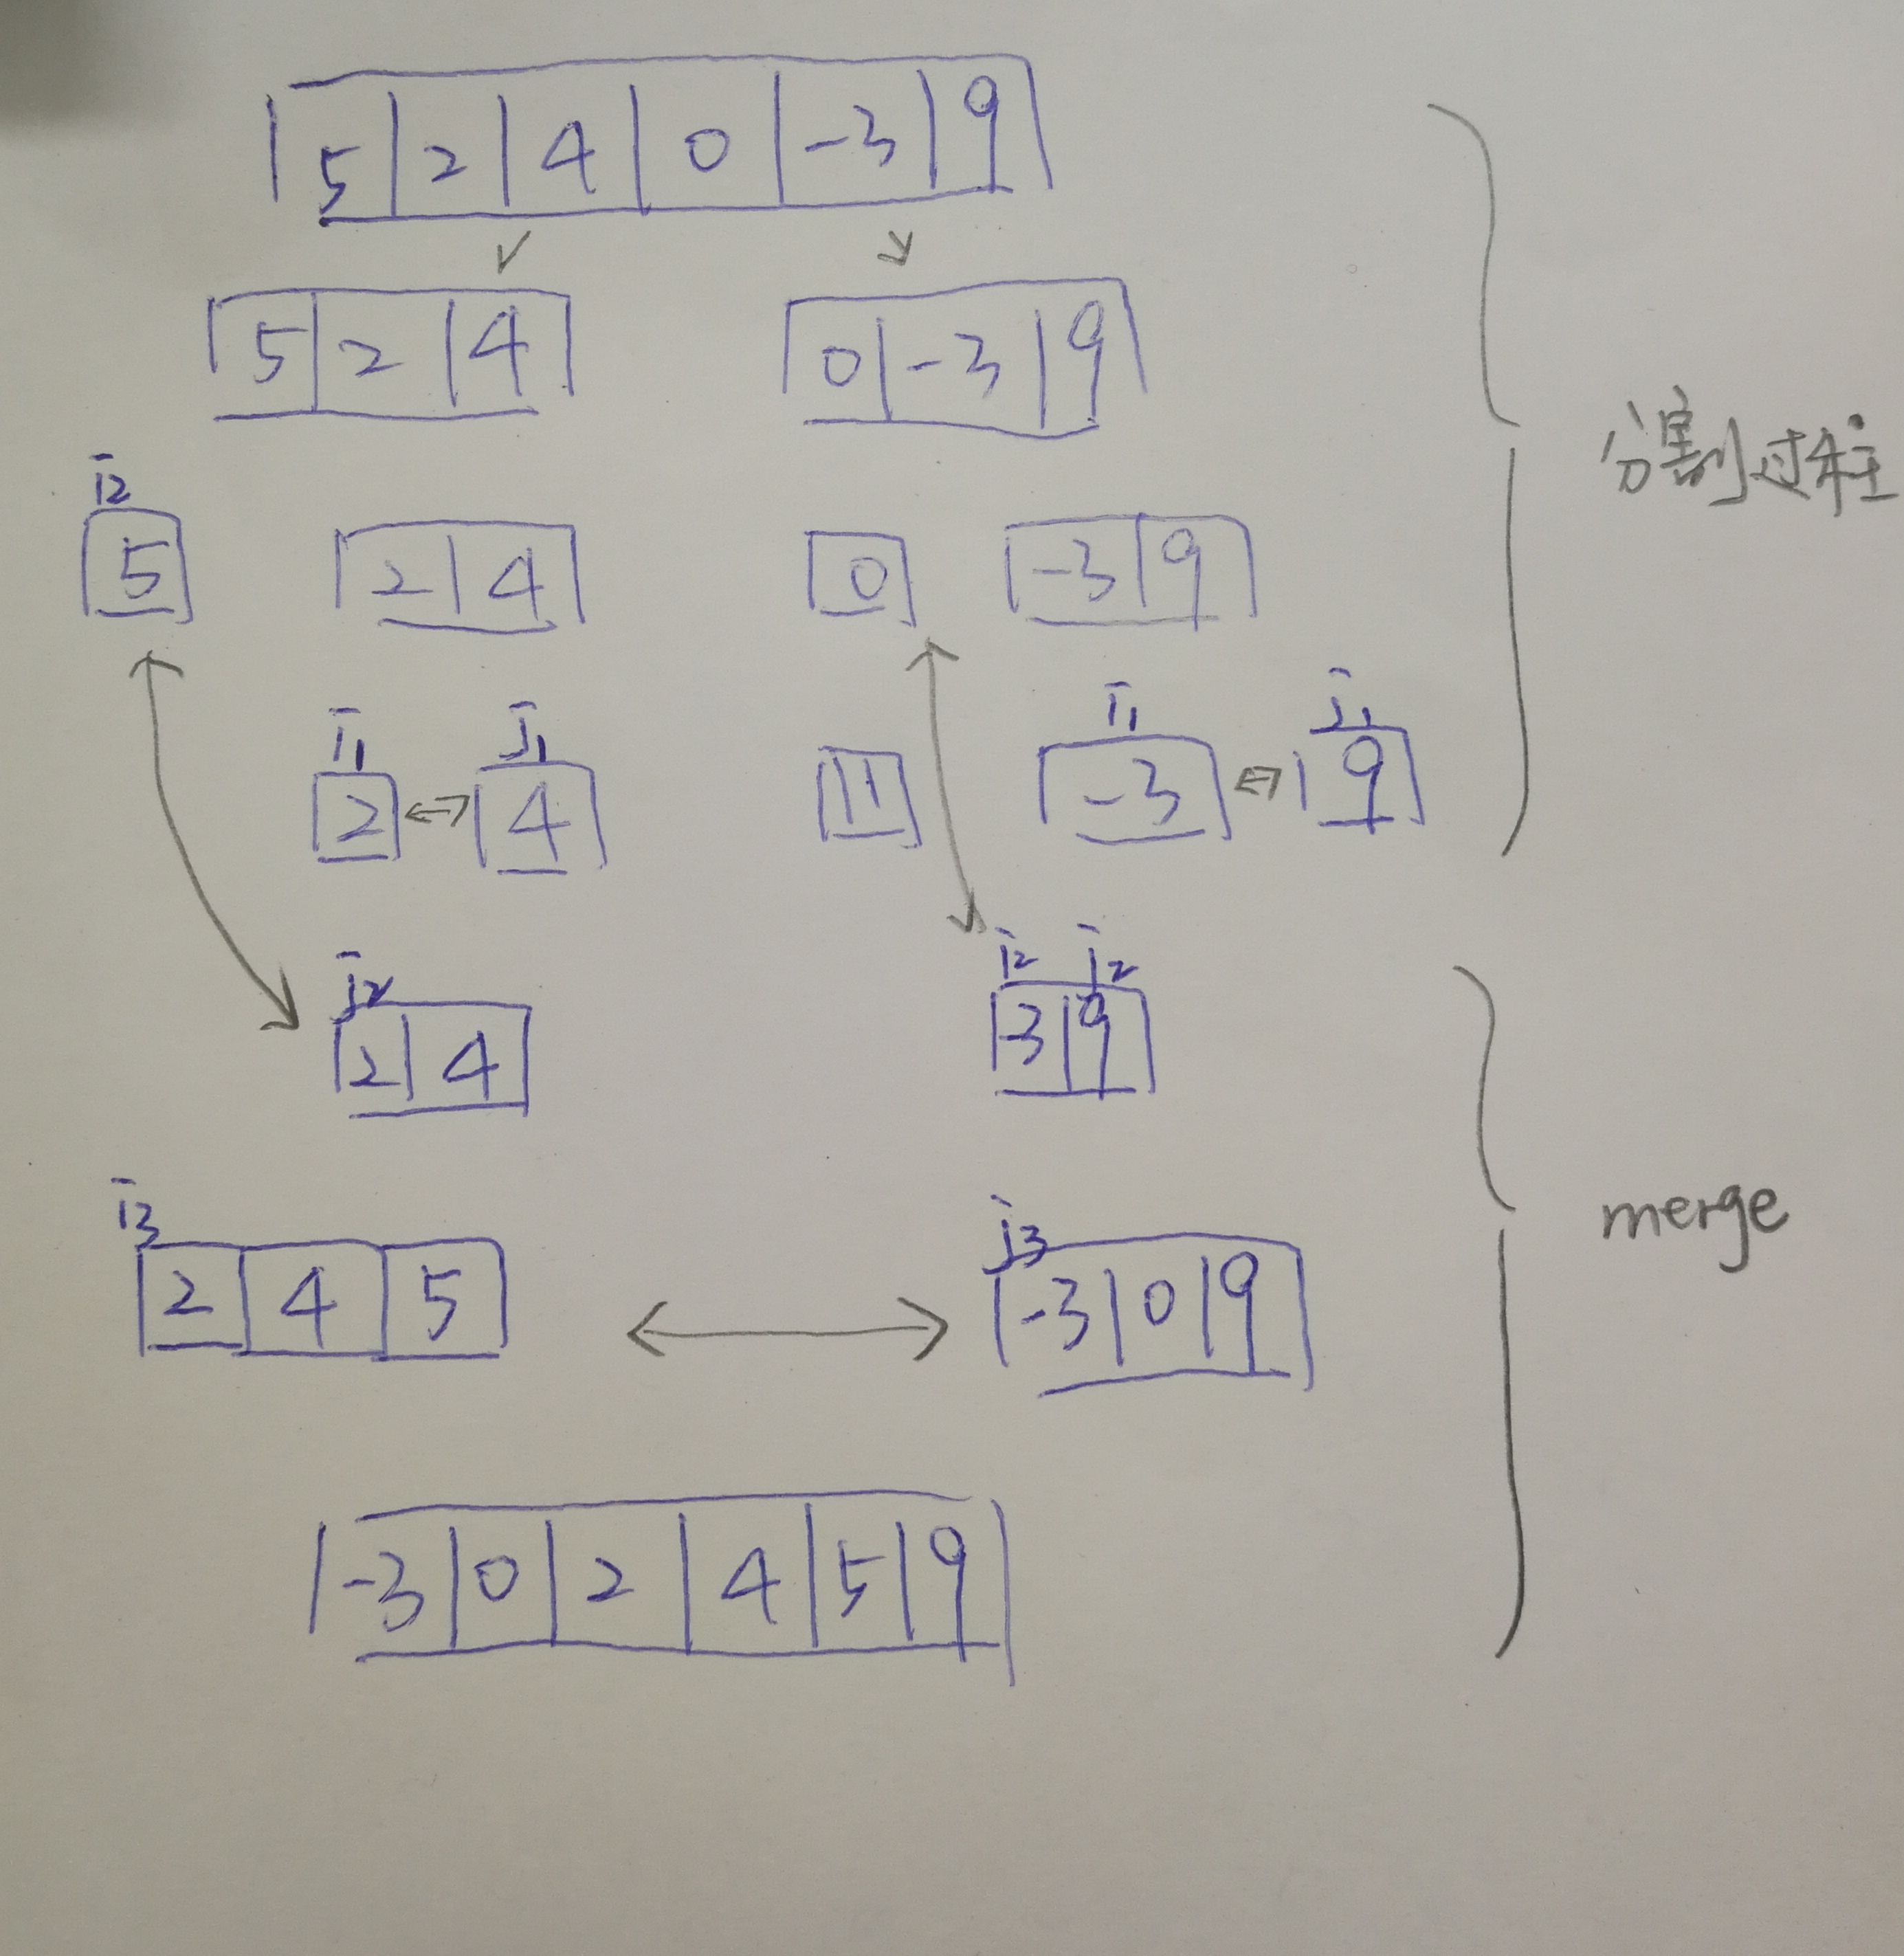